In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 250
plt.show()

In [2]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
# No. Null entries.

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<Axes: >

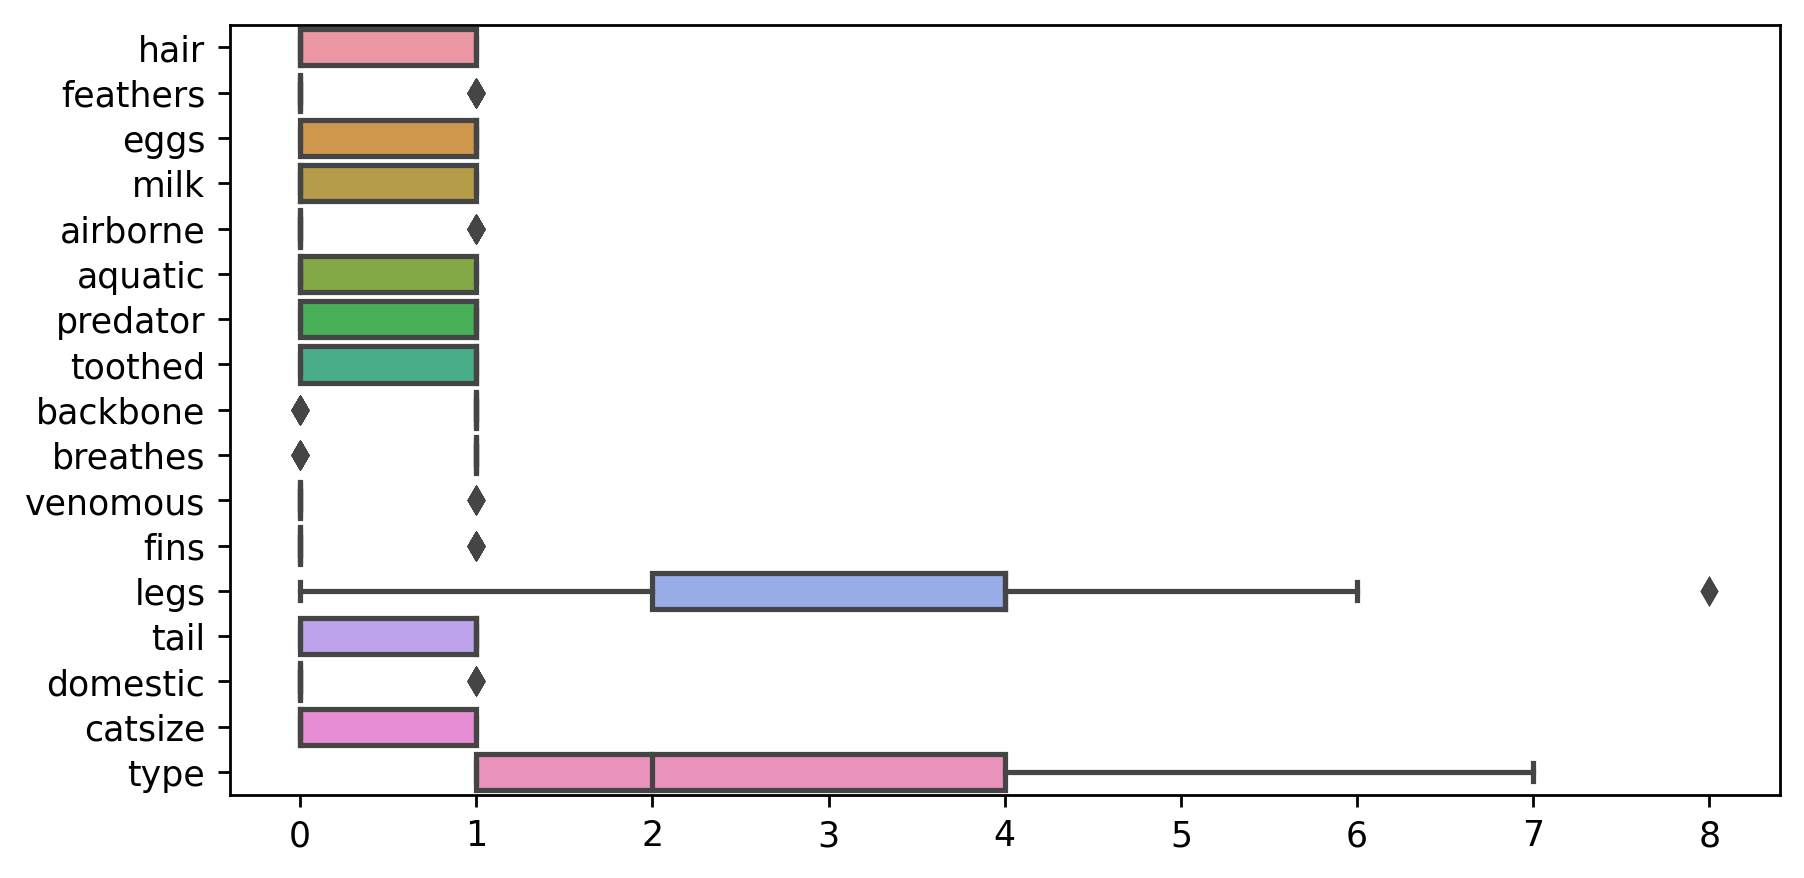

In [7]:
sns.boxplot(data = df, orient = 'h')

In [8]:
# We have outliers datapoints but we are keeping those outliers 

In [9]:
# Data vislualizations

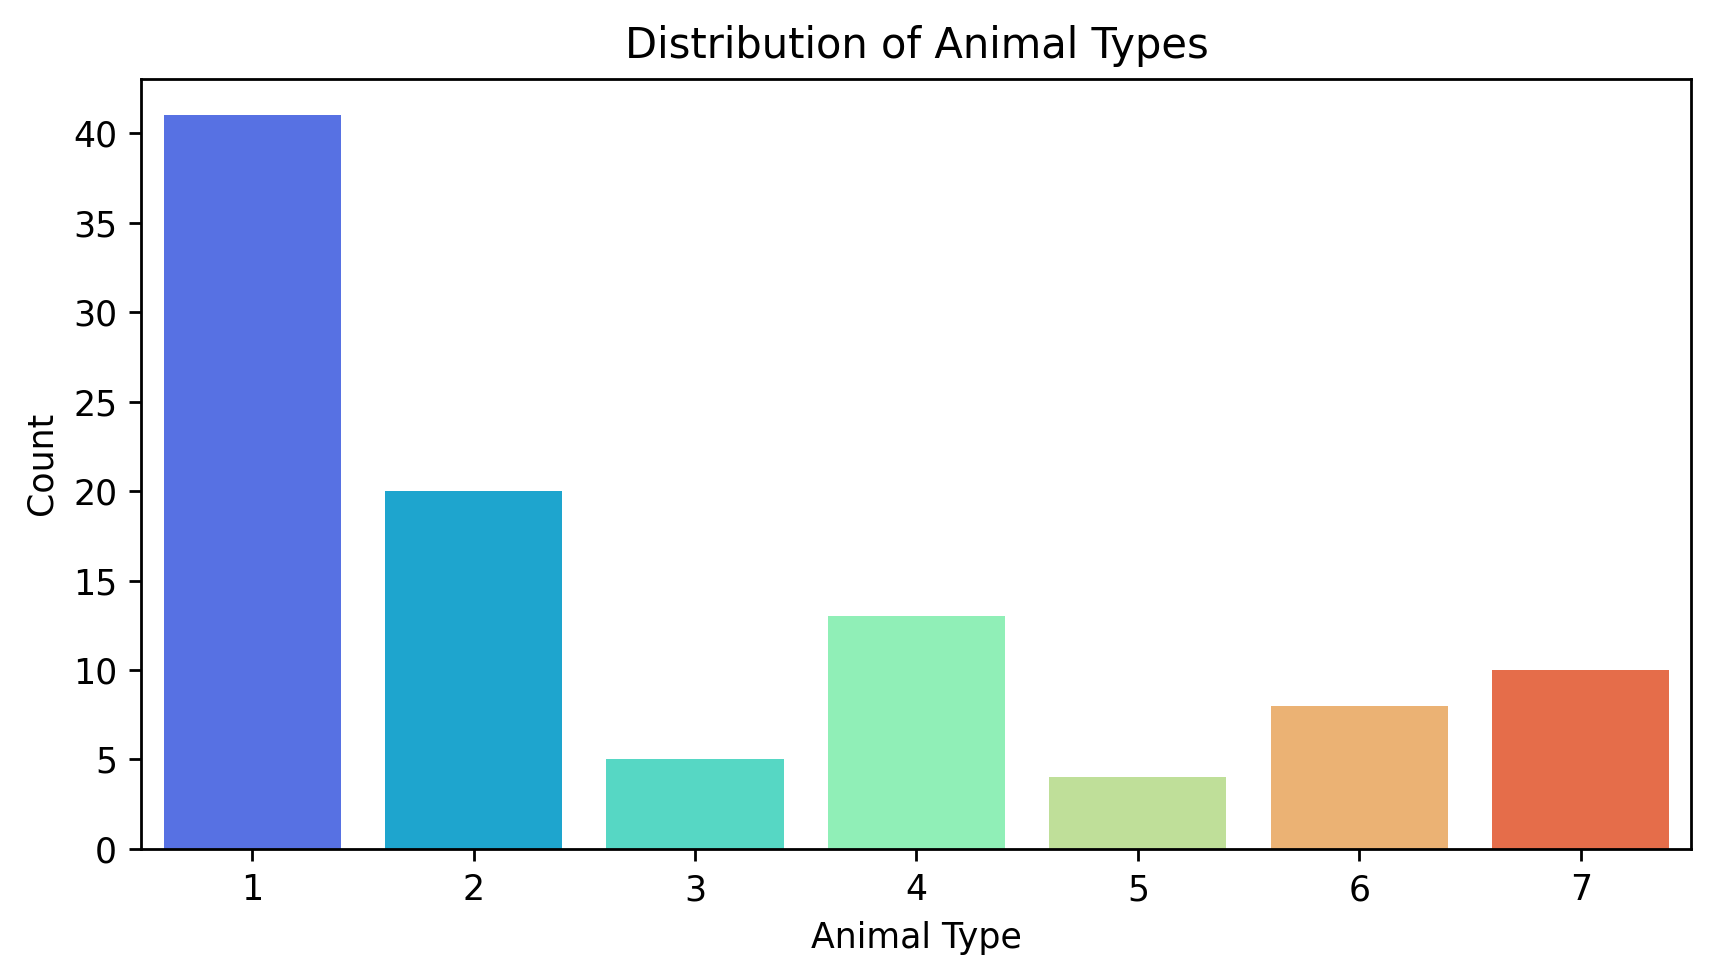

In [10]:
# Distribution of Animal Types
sns.countplot(x='type', data=df, palette='rainbow')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [11]:
# Majority of animals is of 1 type animals

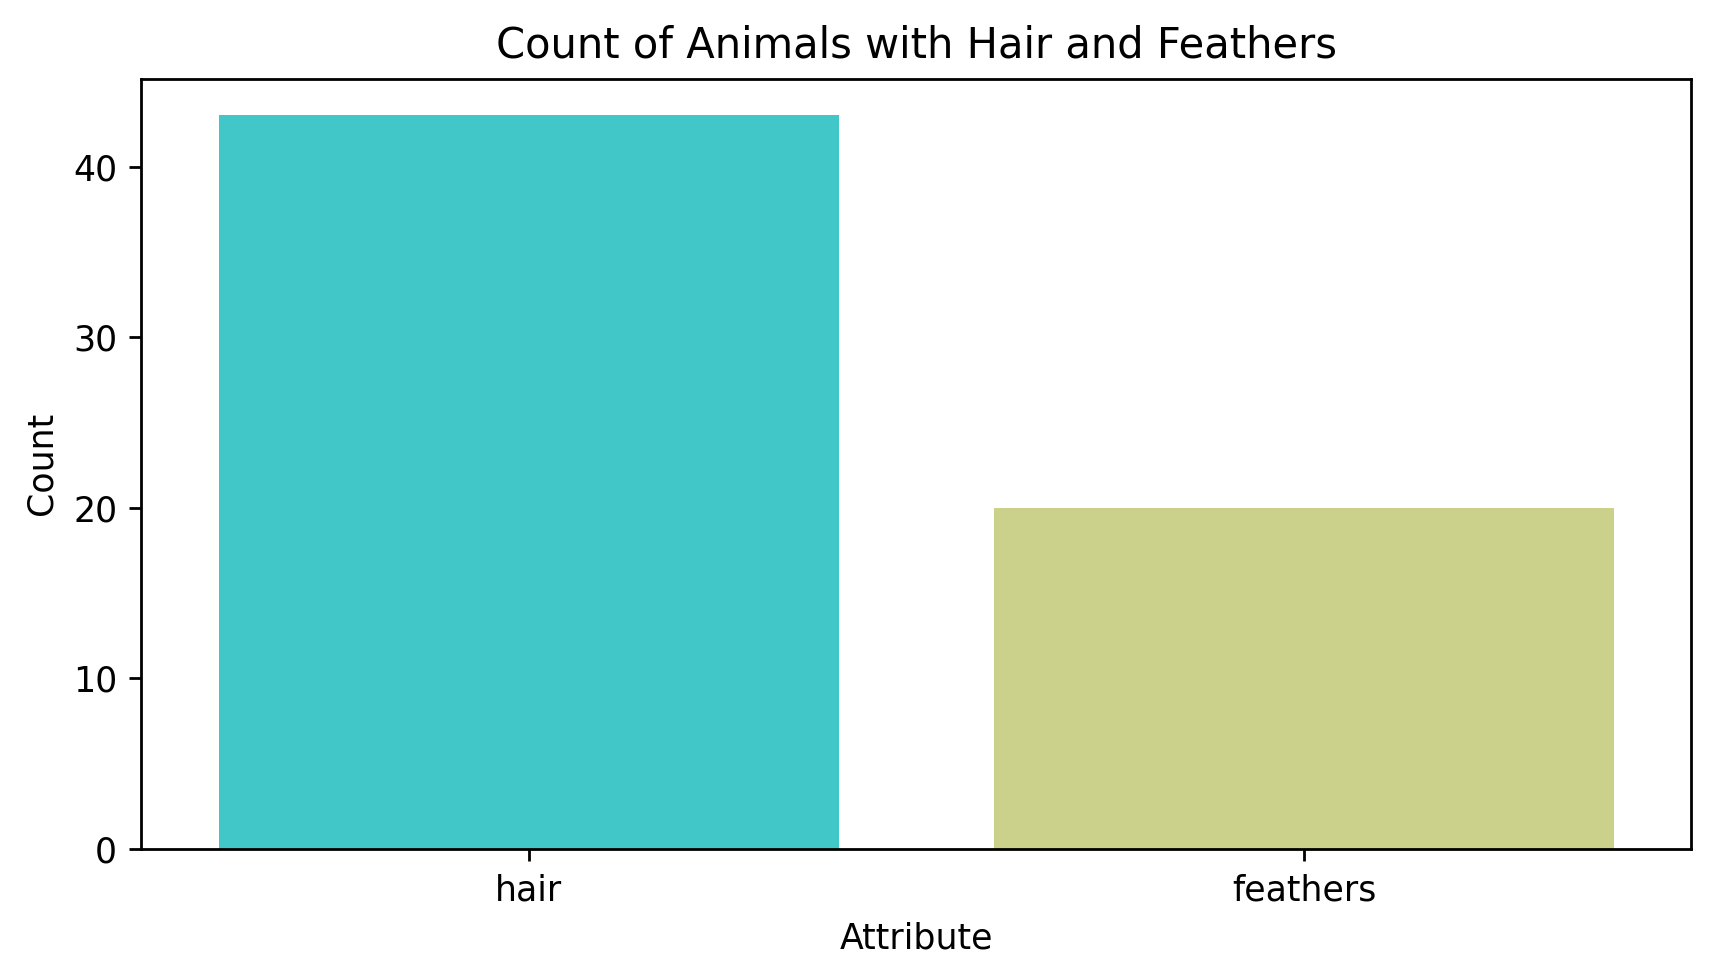

In [12]:
# Hair vs. Feathers
hair_feathers = df[['hair', 'feathers']].sum().reset_index()
hair_feathers.columns = ['Attribute', 'Count']
sns.barplot(x='Attribute', y='Count', data=hair_feathers, palette='rainbow')
plt.title('Count of Animals with Hair and Feathers')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.show()

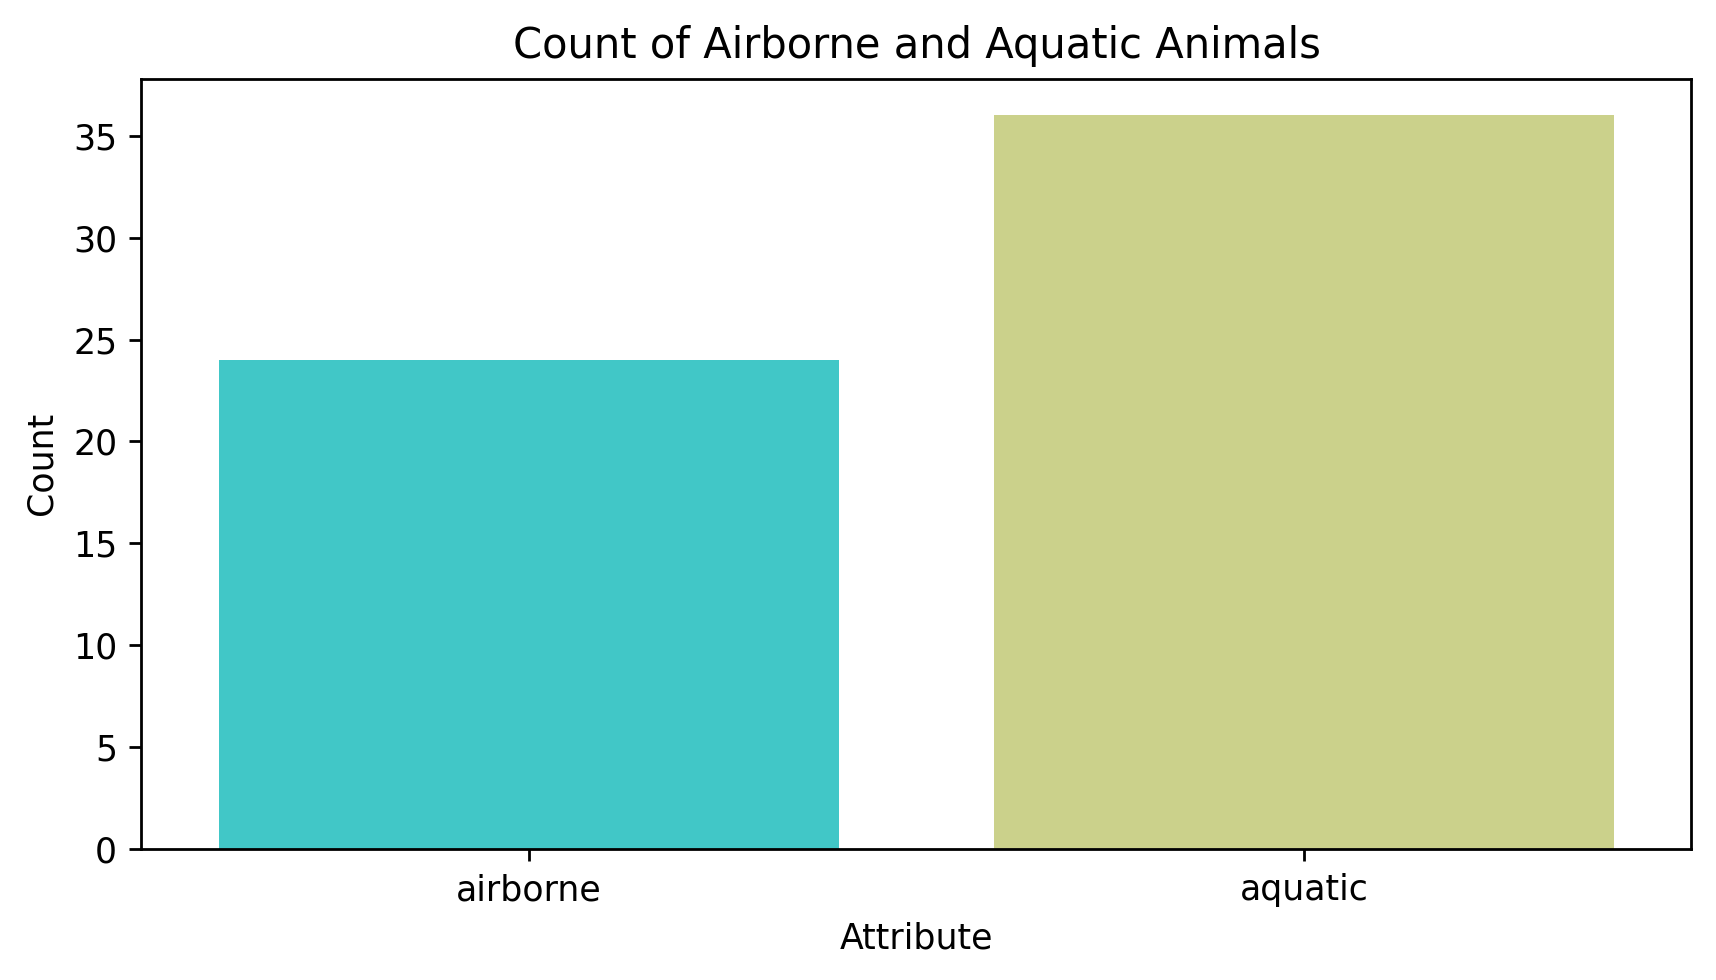

In [13]:
# Airborne and Aquatic Animals
airborne_aquatic = df[['airborne', 'aquatic']].sum().reset_index()
airborne_aquatic.columns = ['Attribute', 'Count']
sns.barplot(x='Attribute', y='Count', data=airborne_aquatic, palette='rainbow')
plt.title('Count of Airborne and Aquatic Animals')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.show()

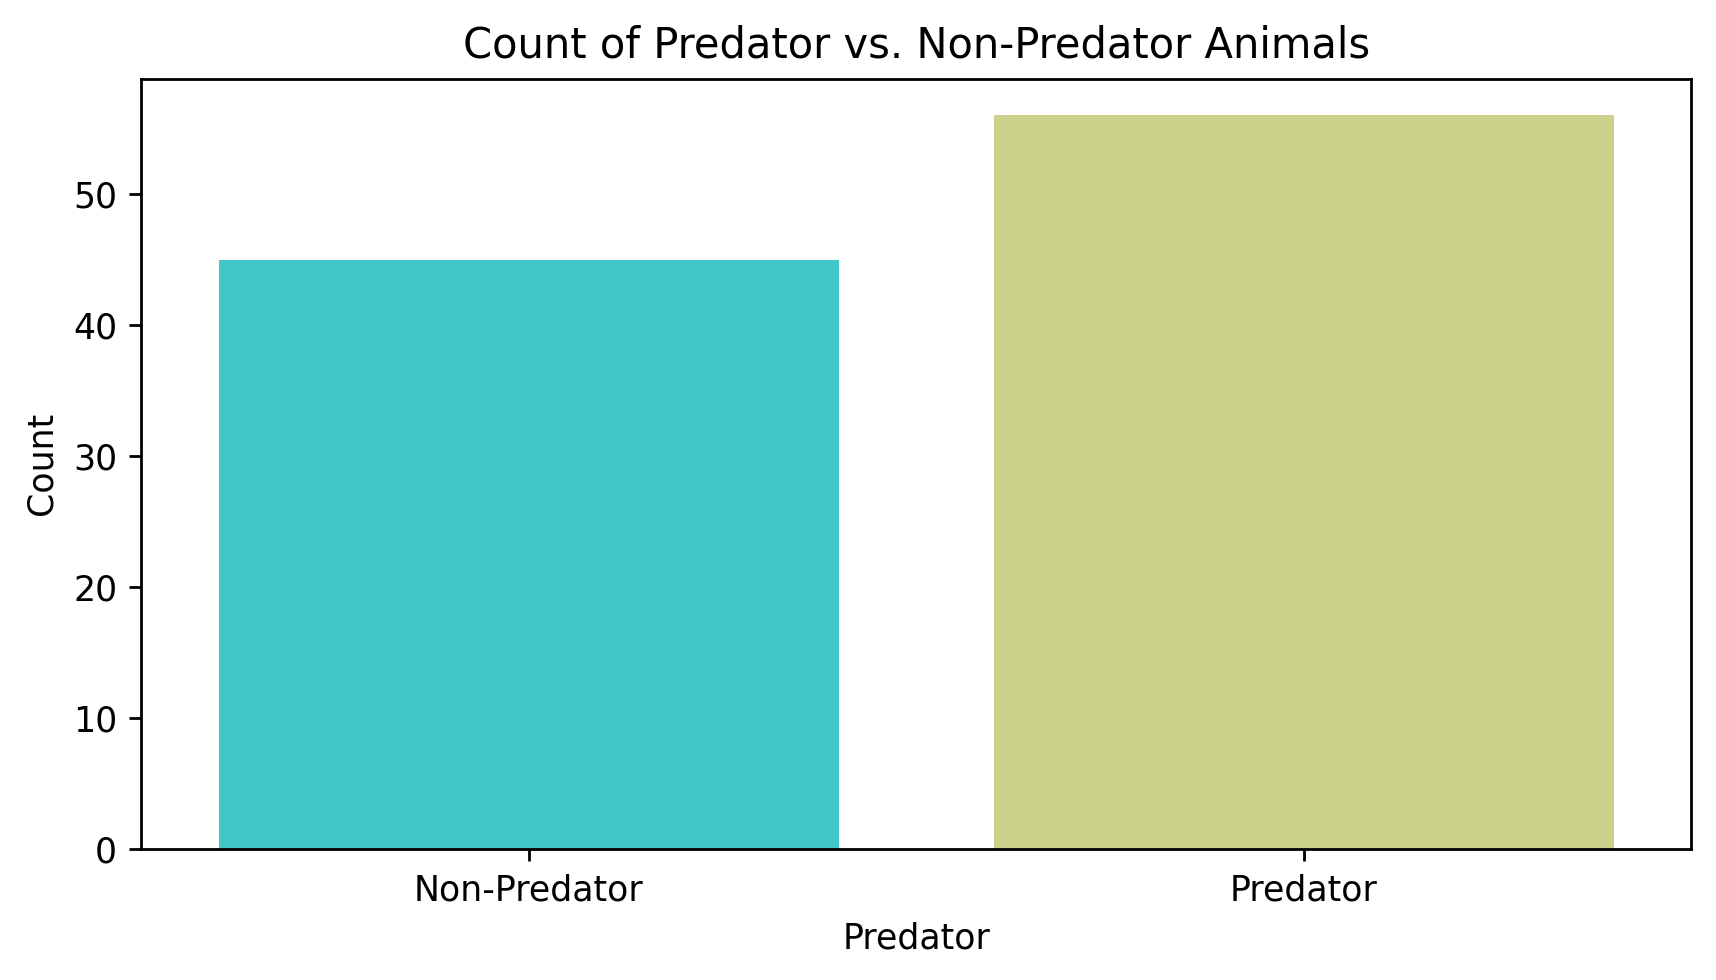

In [14]:
sns.countplot(x='predator', data=df, palette='rainbow')
plt.title('Count of Predator vs. Non-Predator Animals')
plt.xlabel('Predator')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Predator', 'Predator'])
plt.show()

In [15]:
# Checking for correlation metrics
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


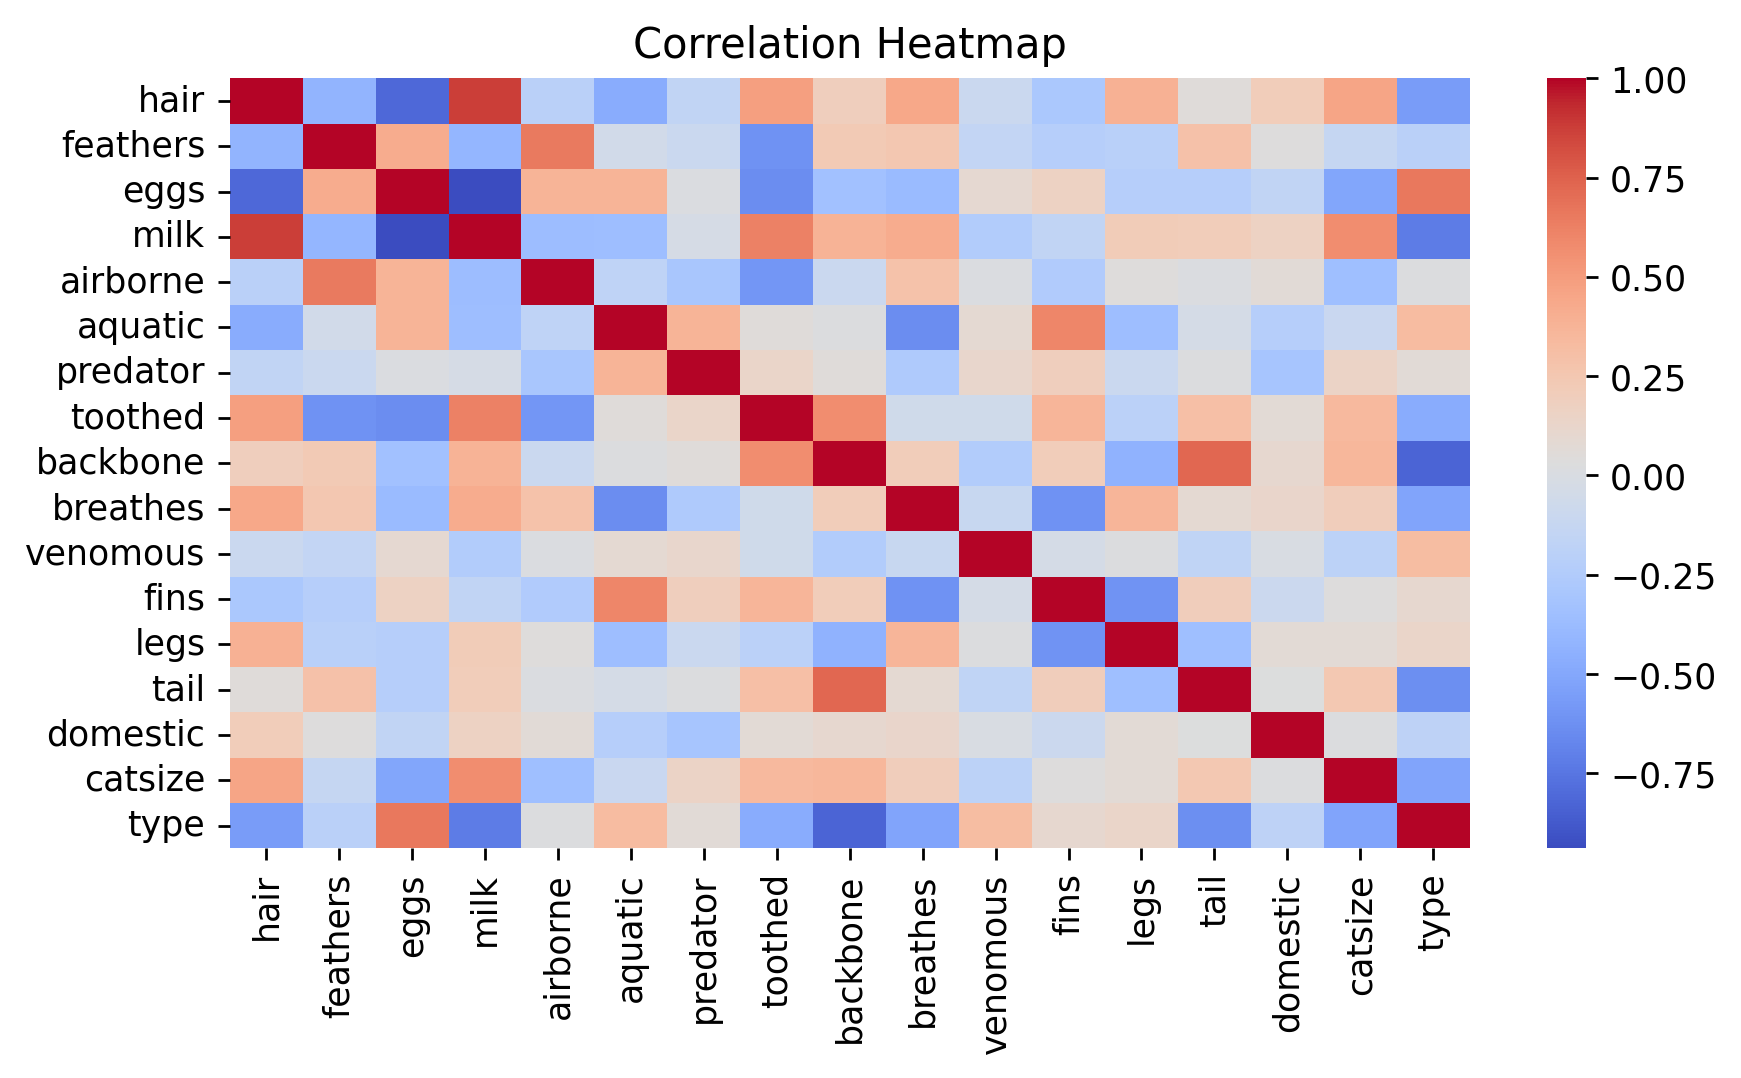

In [16]:
# Visualizing correlations 
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* Strong positive correlations -
1. Hair and Milk
2. Feathers and Airborne
3. Backbone and Tail

* Strong Negative correnaltions - 
1. Hair and Eggs
2. Milk and Eggs

* Moderate Negative Correlations-
1. Toothed and Eggs
2. Aquatic and Breathes
3. Toothed and Feathers
4. Backbone and Eggs

In [17]:
# Converting categorical data into numerical
df = pd.get_dummies(df)

In [18]:
# Defining features and Labels.
x = df.drop(columns=['type'])
y = df['type']

In [19]:
# Splitting dataset into training and testing dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Model building using for loop to get ideal K -Value (n_neigbor value)
train_acc = []
test_acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [21]:
train_acc

[1.0,
 0.9875,
 0.9875,
 0.95,
 0.9125,
 0.8875,
 0.9125,
 0.8625,
 0.8625,
 0.8125,
 0.8125,
 0.7625,
 0.7625,
 0.7375,
 0.7375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

In [22]:
test_acc

[1.0,
 1.0,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.7619047619047619,
 0.7142857142857143,
 0.7142857142857143]

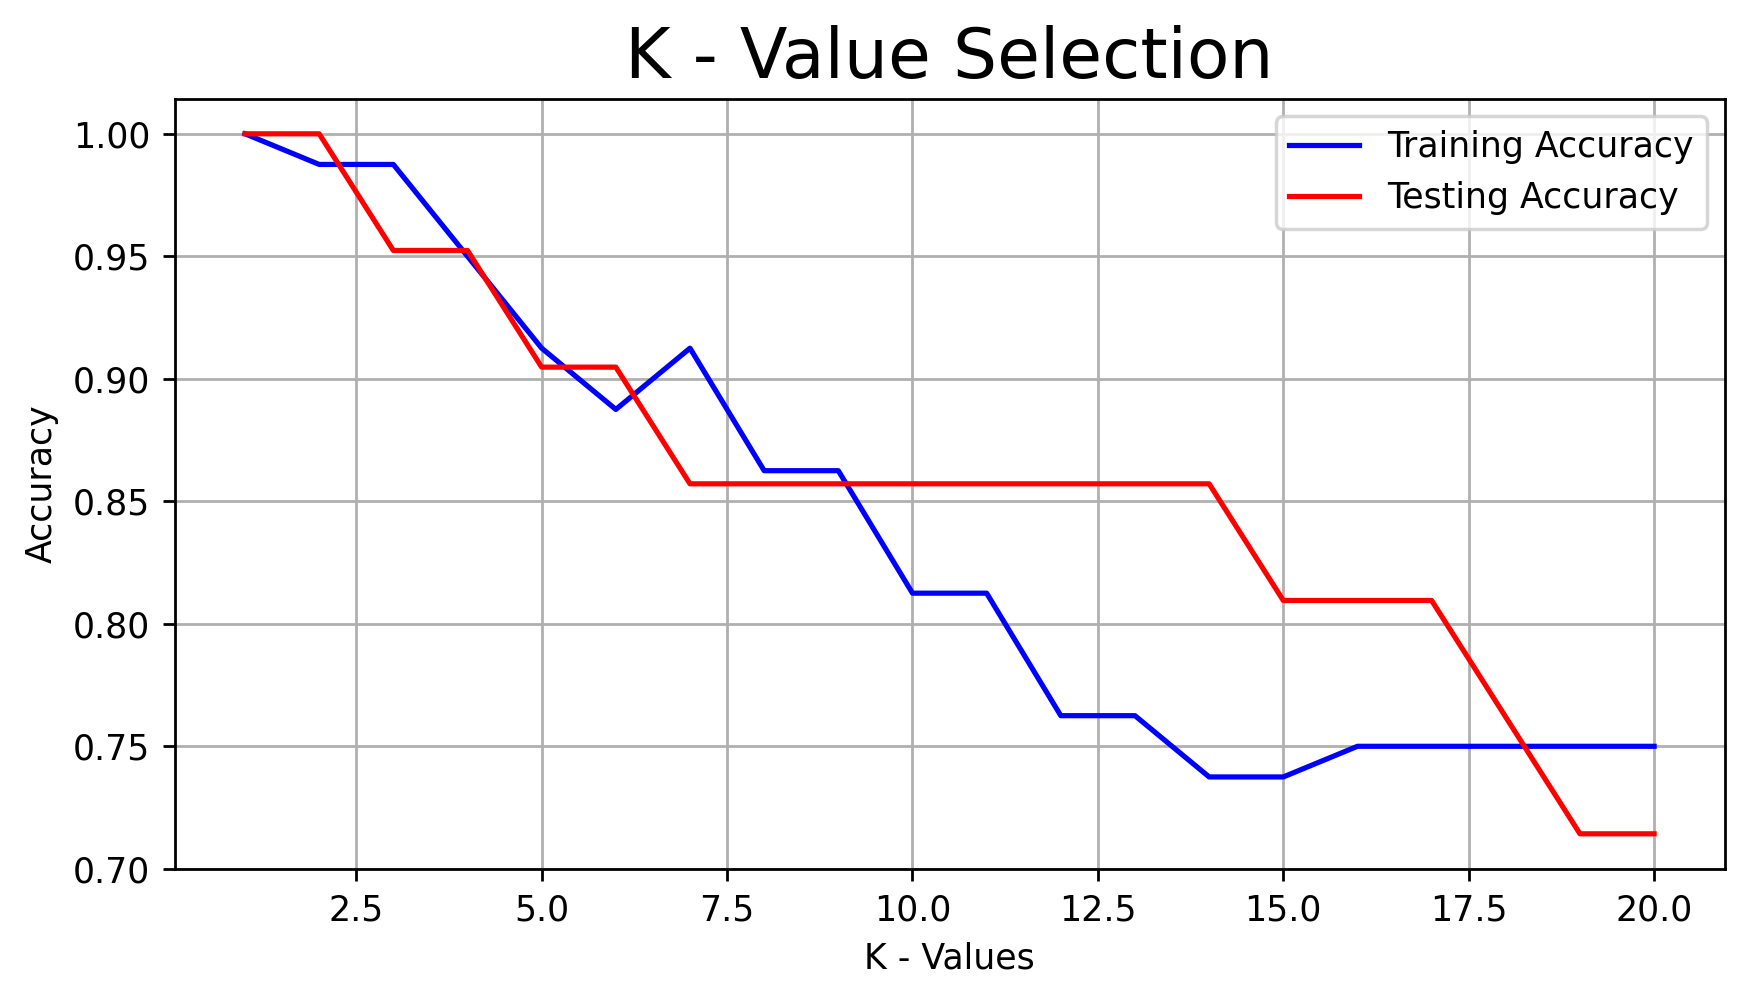

In [23]:
# Visualizing K - Values w.r.t training and testing accuracies
plt.plot(range(1, 21), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1, 21), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K - Values')
plt.ylabel('Accuracy')
plt.title('K - Value Selection', size = 20)
plt.legend()
plt.grid()

In [24]:
# Final model building with optimal K - Value
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print(f'Training Accuracy = {knn.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {knn.score(xtest, ytest)}')
print(classification_report(ytest, ypred))

Training Accuracy = 0.95
Testing Accuracy = 0.9523809523809523
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [25]:
# Applying Standardization of features
sc = StandardScaler()
x = sc.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [26]:
# Model building using standardized data and for loop to get ideal K -Value (n_neigbor value)
train_acc = []
test_acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [27]:
train_acc

[1.0,
 0.8,
 0.075,
 0.775,
 0.9625,
 0.9625,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.8875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.8875,
 0.8875]

In [28]:
test_acc

[0.047619047619047616,
 0.19047619047619047,
 0.047619047619047616,
 0.8571428571428571,
 0.9523809523809523,
 0.9047619047619048,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

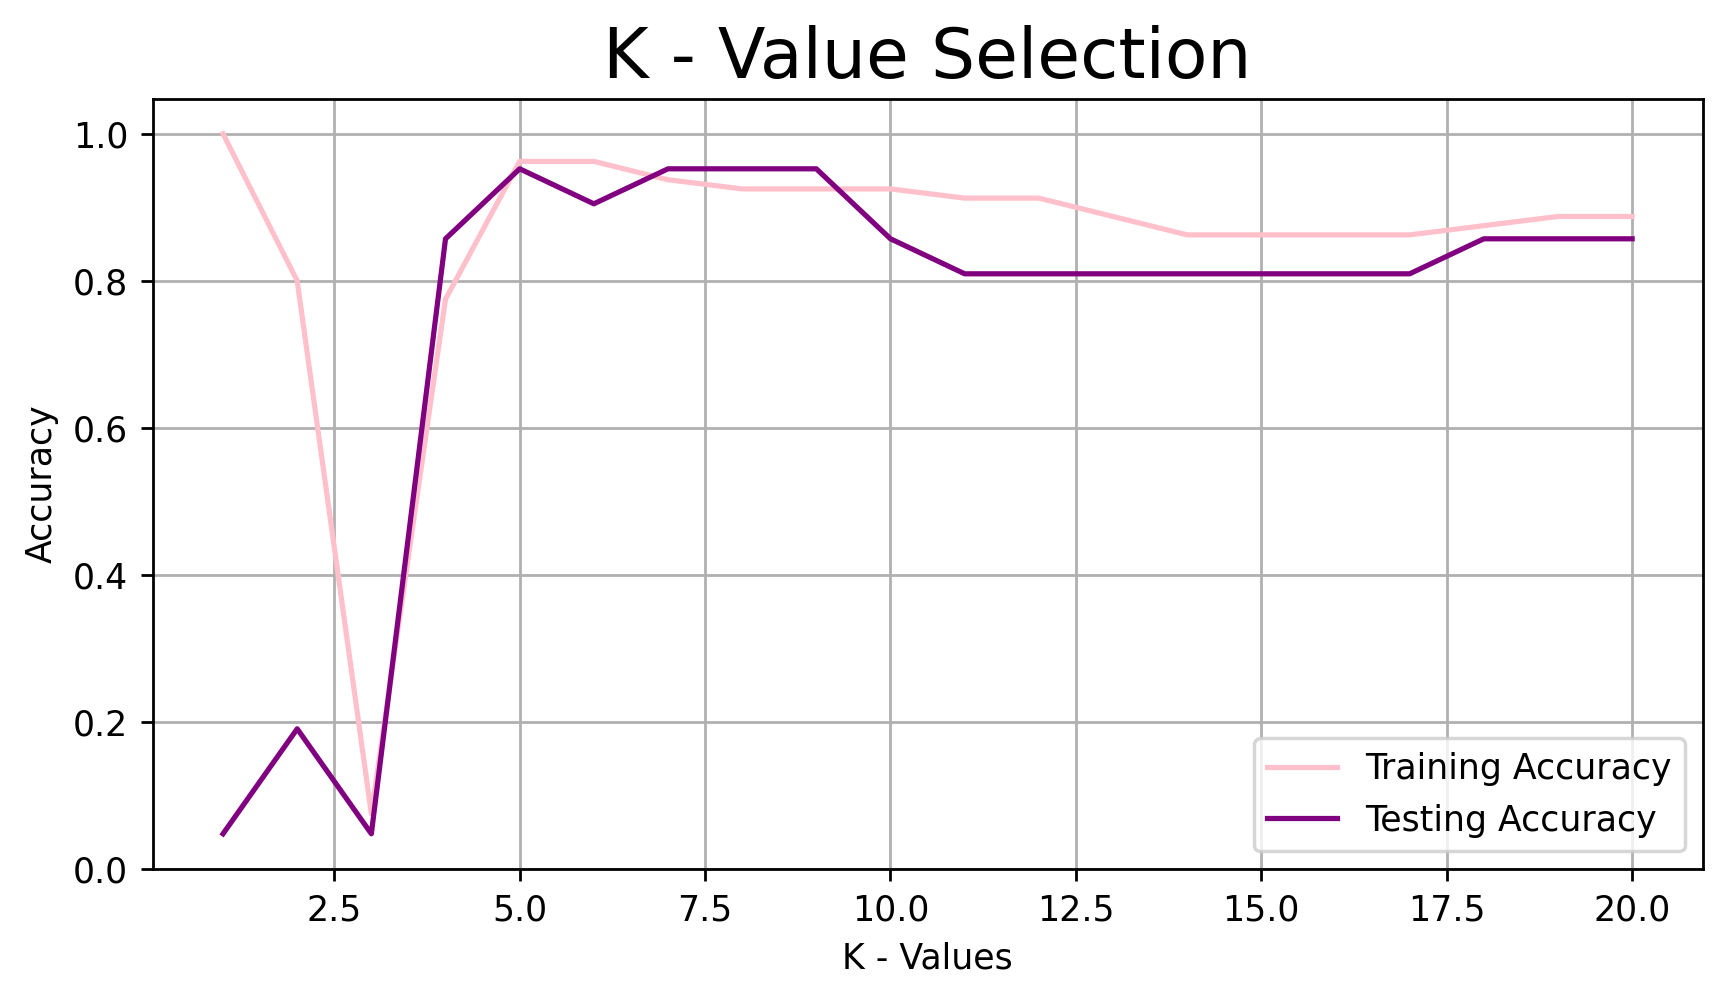

In [29]:
# Visualizing K - Values w.r.t training and testing accuracies
plt.plot(range(1, 21), train_acc, color = 'pink', label = 'Training Accuracy')
plt.plot(range(1, 21), test_acc, color = 'purple', label = 'Testing Accuracy')
plt.xlabel('K - Values')
plt.ylabel('Accuracy')
plt.title('K - Value Selection', size = 20)
plt.legend()
plt.grid()

In [30]:
# Final model building with optimal K - Value
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print(f'Training Accuracy = {knn.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {knn.score(xtest, ytest)}')
print(classification_report(ytest, ypred))

Training Accuracy = 0.9625
Testing Accuracy = 0.9523809523809523
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.92      0.92      0.89        21
weighted avg       0.98      0.95      0.95        21



In [31]:
# After applying standardization on features we got slightly increase in Training accuracy.

In [32]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal name_tuatara,animal name_tuna,animal name_vampire,animal name_vole,animal name_vulture,animal name_wallaby,animal name_wasp,animal name_wolf,animal name_worm,animal name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Applying PCA for dimensionality reduction and feature extraction
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-2.796002,-0.296878,1.484879,-1.434188,-0.438295,0.402858,-0.090237,-0.522505,2.328524,0.450433,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,4.997701,-0.005326,4.015693e-15
1,-3.173330,-0.458198,-0.119910,-0.018412,-0.490554,-0.959333,1.312360,0.594909,-0.992880,0.391887,...,-1.517787,-1.222500,0.645342,0.385338,-2.114212,-0.350176,0.287070,-0.389893,-0.000633,4.015693e-15
2,1.942264,4.228600,-0.214089,0.785181,-0.446076,-0.581244,-0.947112,-0.344280,-0.291084,-0.984680,...,-0.903707,0.425714,-0.626497,-0.839262,0.284928,-0.335668,-0.713730,-0.644771,-0.011770,4.015693e-15
3,-2.796002,-0.296878,1.484879,-1.434188,-0.438295,0.402858,-0.090237,-0.522505,2.328524,0.450433,...,-1.055145,1.104756,0.036905,-0.721848,0.004785,1.013777,1.907850,0.352353,-0.005326,4.015693e-15
4,-3.108925,0.122264,0.163220,-1.591238,0.204441,0.105236,-0.230047,0.115019,-0.222391,-0.847648,...,1.089322,-0.093343,-1.172668,-0.726769,-1.396964,1.437900,-1.626440,-0.608688,-0.003934,4.015693e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-3.048445,-0.074417,-0.489793,0.205684,-0.384821,-1.204461,1.512885,0.820000,0.178291,0.103957,...,0.392442,1.752344,-0.970488,-0.377858,1.341983,0.866966,0.004126,-0.586565,-0.000891,4.015693e-15
97,1.837791,-3.674069,3.244721,0.977649,3.295568,-1.383301,2.931561,-2.095216,-0.351535,-0.400525,...,0.223151,-0.752075,0.204809,-0.706921,0.974399,-1.026132,0.273781,-0.620522,0.084352,4.015693e-15
98,-3.108925,0.122264,0.163220,-1.591238,0.204441,0.105236,-0.230047,0.115019,-0.222391,-0.847648,...,0.575466,-2.538181,-0.118941,-1.118176,2.418573,-1.094293,0.033541,-0.088576,-0.003934,4.015693e-15
99,2.226458,-1.435409,1.686681,0.977417,-1.470097,-1.473503,0.767831,2.430250,3.231469,-0.117144,...,0.205279,0.008792,0.846406,-0.383354,0.234836,0.366268,-1.104617,1.304825,-0.015802,4.015693e-15


In [34]:
pca.explained_variance_ratio_

array([4.89701131e-02, 3.75110609e-02, 2.90837305e-02, 1.93169668e-02,
       1.66892789e-02, 1.51381421e-02, 1.35238161e-02, 1.31244988e-02,
       1.25678797e-02, 1.20013143e-02, 1.11020881e-02, 1.05254141e-02,
       9.82394347e-03, 9.71692290e-03, 9.01482959e-03, 8.85772365e-03,
       8.75420547e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
       8.70689655e-03, 8.70689655e-03, 8.70689655e-03, 8.70689655e-03,
      

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04897011, 0.08648117, 0.1155649 , 0.13488187, 0.15157115,
       0.16670929, 0.18023311, 0.19335761, 0.20592549, 0.2179268 ,
       0.22902889, 0.2395543 , 0.24937825, 0.25909517, 0.26811   ,
       0.27696772, 0.28572193, 0.29442882, 0.30313572, 0.31184262,
       0.32054951, 0.32925641, 0.33796331, 0.3466702 , 0.3553771 ,
       0.364084  , 0.37279089, 0.38149779, 0.39020469, 0.39891158,
       0.40761848, 0.41632538, 0.42503227, 0.43373917, 0.44244607,
       0.45115296, 0.45985986, 0.46856676, 0.47727365, 0.48598055,
       0.49468745, 0.50339434, 0.51210124, 0.52080814, 0.52951503,
       0.53822193, 0.54692882, 0.55563572, 0.56434262, 0.57304951,
       0.58175641, 0.59046331, 0.5991702 , 0.6078771 , 0.616584  ,
       0.62529089, 0.63399779, 0.64270469, 0.65141158, 0.66011848,
       0.66882538, 0.67753227, 0.68623917, 0.69494607, 0.70365296,
       0.71235986, 0.72106676, 0.72977365, 0.73848055, 0.74718745,
       0.75589434, 0.76460124, 0.77330814, 0.78201503, 0.79072

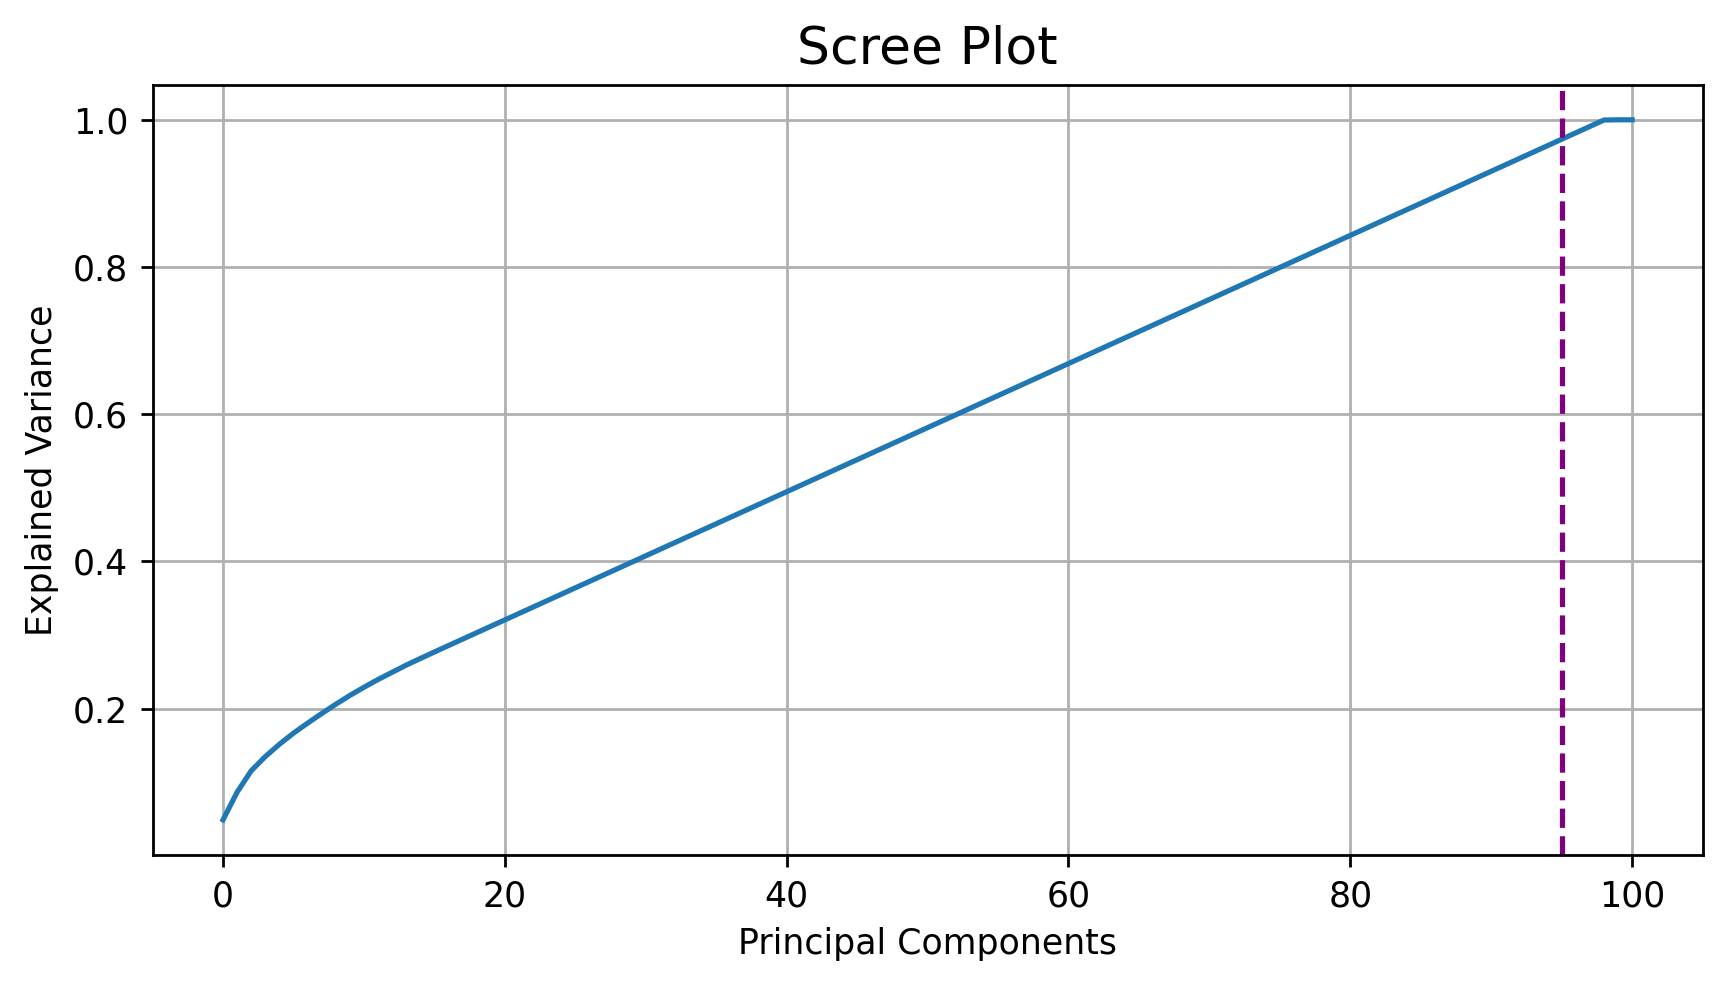

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 15)
plt.axvline(x = 95, color = 'purple', linestyle = '--')
plt.grid()

In [37]:
pca = PCA(n_components=95)
pcs = pca.fit_transform(x)
pcs

array([[-2.79600237, -0.29687775,  1.48487857, ..., -0.        ,
         0.        , -0.        ],
       [-3.17332969, -0.45819813, -0.11990988, ..., -1.22250011,
         0.64534232,  0.38533771],
       [ 1.94226367,  4.22859991, -0.21408853, ...,  0.42571385,
        -0.62649654, -0.83926219],
       ...,
       [-3.10892514,  0.12226364,  0.16321951, ..., -2.53818144,
        -0.11894116, -1.11817554],
       [ 2.22645758, -1.43540933,  1.68668145, ...,  0.0087917 ,
         0.84640645, -0.38335443],
       [ 2.26086128, -2.17689173, -2.98381108, ..., -0.06144018,
        -1.03386423, -0.49222514]])

In [38]:
data = pd.DataFrame(pcs, columns= [f'PC{i+1}' for i in range(pcs.shape[1])])
data['type'] = y
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,type
0,-2.796002,-0.296878,1.484879,-1.434188,-0.438295,0.402858,-0.090237,-0.522505,2.328524,0.450433,...,-0.000000,0.000000,-8.429991e-175,2.684241e-115,-4.932150e-71,-0.000000,-0.000000,0.000000,-0.000000,1
1,-3.173330,-0.458198,-0.119910,-0.018412,-0.490554,-0.959333,1.312360,0.594909,-0.992880,0.391887,...,-0.266854,-0.723337,-2.624668e+00,-1.704080e+00,6.463872e-01,-1.517787,-1.222500,0.645342,0.385338,1
2,1.942264,4.228600,-0.214089,0.785181,-0.446076,-0.581244,-0.947112,-0.344280,-0.291084,-0.984680,...,-0.970428,0.336133,-1.454470e+00,2.585281e+00,1.931879e+00,-0.903707,0.425714,-0.626497,-0.839262,4
3,-2.796002,-0.296878,1.484879,-1.434188,-0.438295,0.402858,-0.090237,-0.522505,2.328524,0.450433,...,-0.146559,1.058094,1.461372e-01,1.057375e+00,-3.573603e-01,-1.055145,1.104756,0.036905,-0.721848,1
4,-3.108925,0.122264,0.163220,-1.591238,0.204441,0.105236,-0.230047,0.115019,-0.222391,-0.847648,...,0.169641,-0.579754,1.441360e+00,-1.772585e+00,-1.082994e+00,1.089322,-0.093343,-1.172668,-0.726769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-3.048445,-0.074417,-0.489793,0.205684,-0.384821,-1.204461,1.512885,0.820000,0.178291,0.103957,...,-2.485713,-1.209961,-4.572017e-01,-1.216105e+00,7.232540e-01,0.392442,1.752344,-0.970488,-0.377858,1
97,1.837791,-3.674069,3.244721,0.977649,3.295568,-1.383301,2.931561,-2.095216,-0.351535,-0.400525,...,0.705130,0.807537,-1.207278e-01,4.681878e-01,-1.246279e-01,0.223151,-0.752075,0.204809,-0.706921,6
98,-3.108925,0.122264,0.163220,-1.591238,0.204441,0.105236,-0.230047,0.115019,-0.222391,-0.847648,...,0.610733,0.420416,5.841106e-01,-7.171526e-01,-6.072239e-01,0.575466,-2.538181,-0.118941,-1.118176,1
99,2.226458,-1.435409,1.686681,0.977417,-1.470097,-1.473503,0.767831,2.430250,3.231469,-0.117144,...,-0.963497,1.475132,3.397287e-01,9.226409e-01,-5.719990e-01,0.205279,0.008792,0.846406,-0.383354,7


<Axes: xlabel='PC51', ylabel='PC20'>

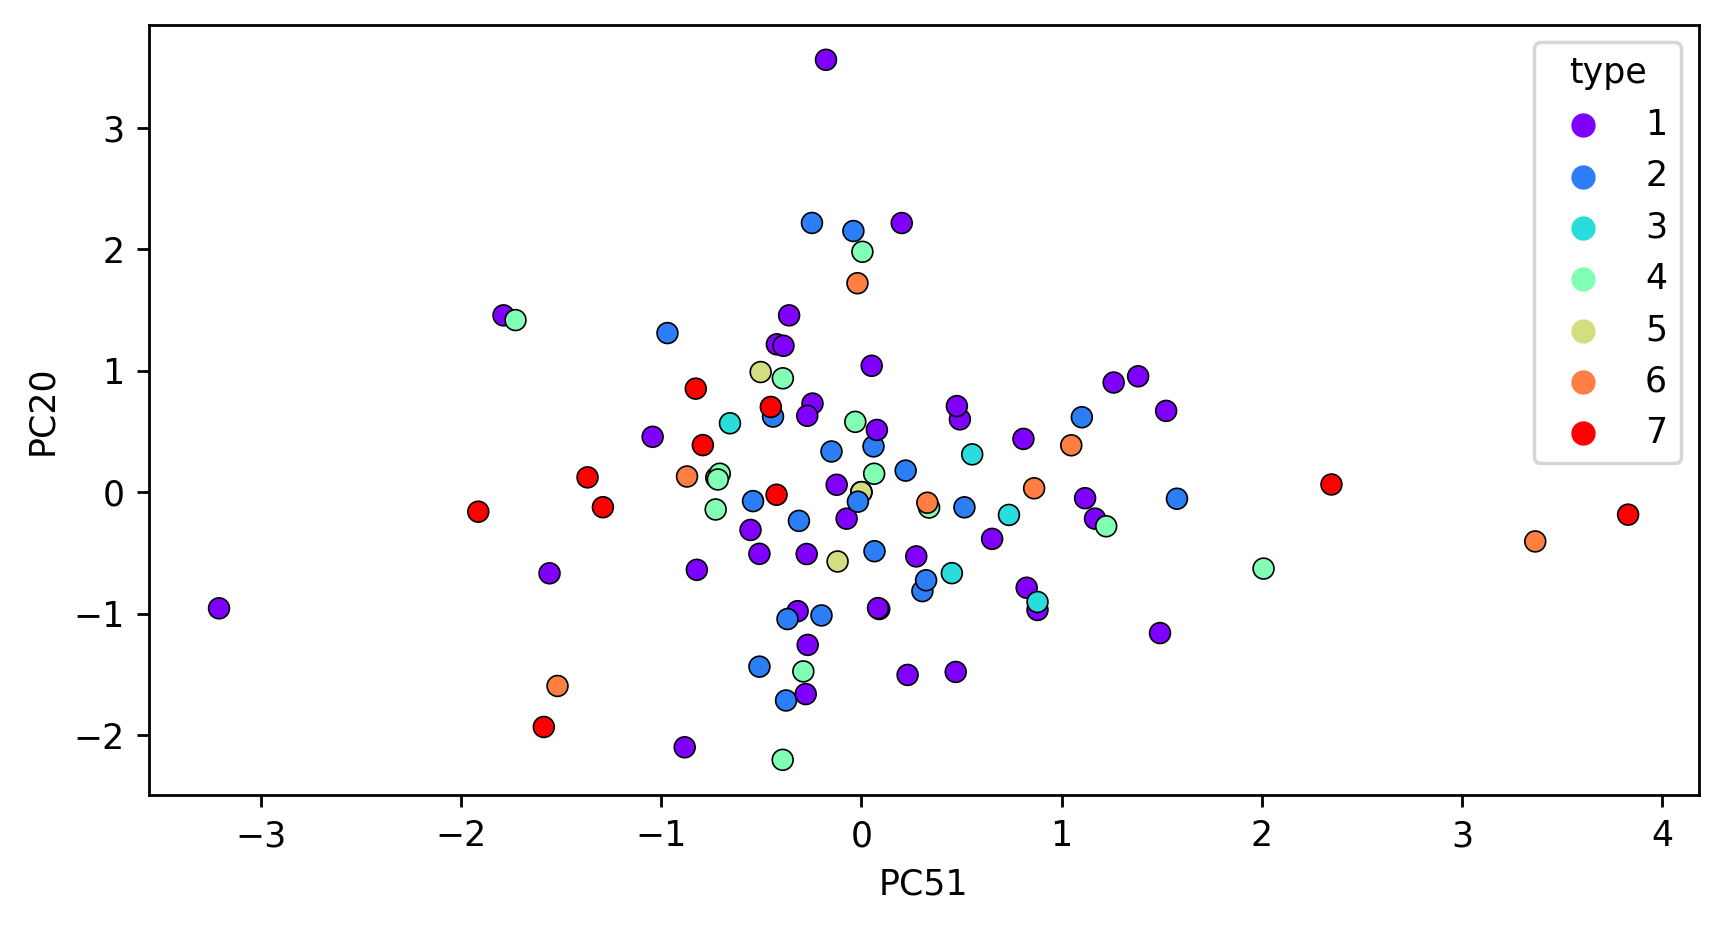

In [39]:
# Visualizing Principal components
sns.scatterplot(x = data['PC51'], y = data['PC20'], hue = data['type'], edgecolor = 'black', palette='rainbow')

In [40]:
# Model building as per PCA features 
x = data.iloc[:, :-1]
y = y
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
train_acc = []
test_acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

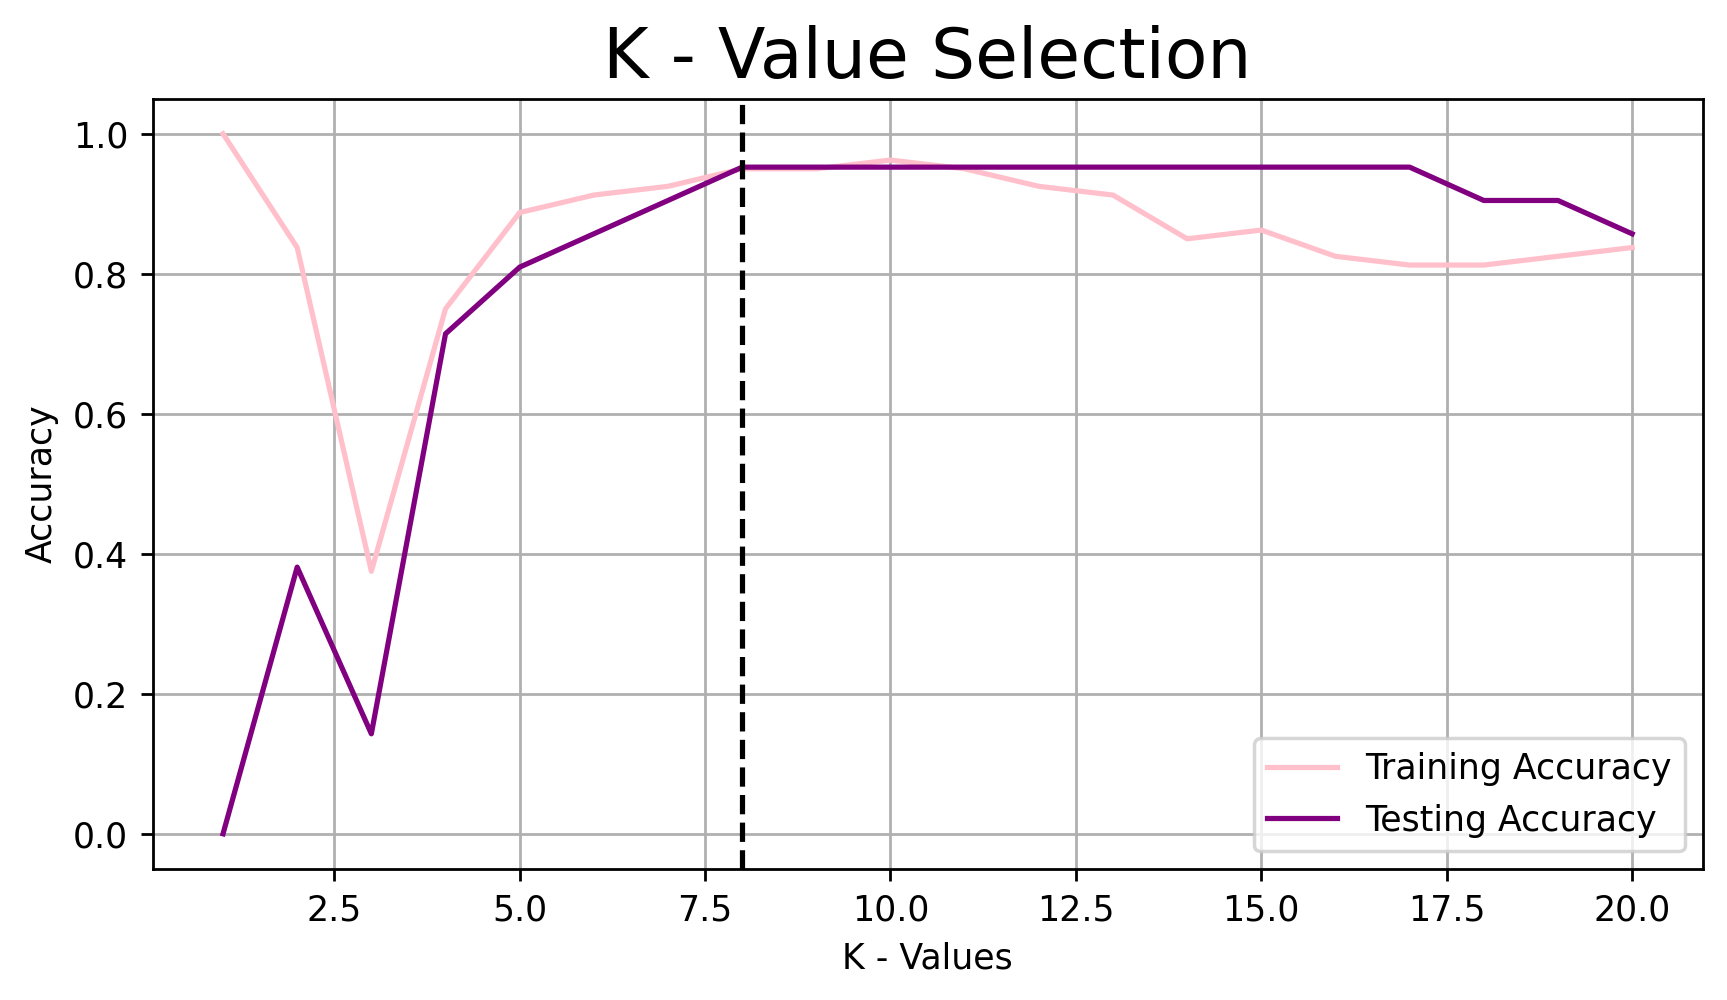

In [41]:
plt.plot(range(1, 21), train_acc, color = 'pink', label = 'Training Accuracy')
plt.plot(range(1, 21), test_acc, color = 'purple', label = 'Testing Accuracy')
plt.axvline(x = 8, color = 'black', linestyle = '--')
plt.xlabel('K - Values')
plt.ylabel('Accuracy')
plt.title('K - Value Selection', size = 20)
plt.legend()
plt.grid()

In [42]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(xtrain, ytrain)
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))
print(classification_report(ytest, ypred))

0.95
0.9523809523809523
              precision    recall  f1-score   support

           1       0.55      0.50      0.52        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.29        21
   macro avg       0.08      0.07      0.07        21
weighted avg       0.31      0.29      0.30        21



In [43]:
# Here we can see that even after dimensionality reduction we cannot increase the overall model accuracy > 95%.
# Because data provided may be too less to train the model accurately.

 Interview questions
 1. What are the key metrices in KNN?
 
 => There is only 1 hyperparameter in KNN i.e. selection of optimal no. of neighbors (n_neighbors) to classify test datapoint
    for example in binary classification if the n_neighbors value is 5 and 3 out of 5 neighbouring datapoints are near to 
    A class then the test datapoint is classified to A class.
    
    
 2. What distance metric can be used in KNN?
 
 => Calculation of Eucledian distance is the only distance metric used to calculate the distance between nearest datapoints to   classify the test datapoint.